In [64]:
#!git clone https://github.com/timesler/facenet-pytorch.git facenet_pytorch

In [65]:
#!pip install .

In [66]:
#!pip install facenet-pytorch

In [67]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os

workers = 0 if os.name == 'nt' else 4

In [68]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [69]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [70]:
resnet = InceptionResnetV1(pretrained='casia-webface').eval().to(device)

In [71]:
def collate_fn(x):
    return x[0]

dataset = datasets.ImageFolder(r'C:\Users\zhang\Downloads\githubdepression\githubdepression\implementation\AV2014_Training_data_NYU\smallTraining\images')
#dataset = datasets.ImageFolder('/Users/mac/Desktop/githubdepression/implementation/images')
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=workers)

In [72]:
dataset.idx_to_class

{0: 'dscore10', 1: 'dscore3', 2: 'dscore33', 3: 'dscore4', 4: 'dscore6'}

In [73]:
print(type(dataset.idx_to_class))

<class 'dict'>


In [74]:
"""
a=dataset.idx_to_class.values()
b=['48','23','25','11','25']
c=dict(zip(b,a))
print(c)
"""
    

"\na=dataset.idx_to_class.values()\nb=['48','23','25','11','25']\nc=dict(zip(b,a))\nprint(c)\n"

In [75]:
aligned = []
names = []
for x, y in loader:
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:
        print('Face detected with probability: {:8f}'.format(prob))
        aligned.append(x_aligned)
        names.append(dataset.idx_to_class[y])

Face detected with probability: 0.999949
Face detected with probability: 0.974958
Face detected with probability: 0.988487
Face detected with probability: 0.981442
Face detected with probability: 0.987943
Face detected with probability: 0.986212
Face detected with probability: 0.980584
Face detected with probability: 0.993983
Face detected with probability: 0.995519
Face detected with probability: 0.999960
Face detected with probability: 0.987685
Face detected with probability: 0.968237
Face detected with probability: 0.992082
Face detected with probability: 0.978429
Face detected with probability: 0.981827
Face detected with probability: 0.989329
Face detected with probability: 0.767630
Face detected with probability: 0.999798
Face detected with probability: 0.999992
Face detected with probability: 0.998890
Face detected with probability: 0.999978
Face detected with probability: 0.999944
Face detected with probability: 0.999911
Face detected with probability: 0.999911
Face detected wi

In [76]:
aligned = torch.stack(aligned).to(device)
embeddings = resnet(aligned).detach().cpu()

dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in embeddings]
print(pd.DataFrame(dists, columns=names, index=names))

          dscore10  dscore10  dscore10  dscore10  dscore10  dscore10  \
dscore10  0.000000  0.516866  0.536472  0.472457  0.665381  0.696394   
dscore10  0.516866  0.000000  0.144873  0.247037  0.528677  0.525407   
dscore10  0.536472  0.144873  0.000000  0.260664  0.479858  0.477914   
dscore10  0.472457  0.247037  0.260664  0.000000  0.487863  0.505485   
dscore10  0.665381  0.528677  0.479858  0.487863  0.000000  0.223436   
...            ...       ...       ...       ...       ...       ...   
dscore6   1.394861  1.326828  1.303257  1.371130  1.333081  1.298906   
dscore6   1.359815  1.313239  1.290674  1.358383  1.319132  1.292251   
dscore6   1.360698  1.325784  1.298693  1.387094  1.337136  1.299410   
dscore6   1.349554  1.278518  1.253085  1.339139  1.284343  1.241689   
dscore6   1.340704  1.296417  1.263223  1.345824  1.295125  1.263738   

          dscore10  dscore10  dscore10  dscore10  ...   dscore6   dscore6  \
dscore10  0.664017  0.642058  0.648427  0.224468  ...  1.4

In [77]:
#!pip install mmcv

In [78]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

mtcnn = MTCNN(keep_all=True, device=device)

Running on device: cpu


In [79]:
import mmcv
video = mmcv.VideoReader(r'C:\Users\zhang\Downloads\githubdepression\githubdepression\implementation\facenet_pytorch\examples\video.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video(r'C:\Users\zhang\Downloads\githubdepression\githubdepression\implementation\facenet_pytorch\examples\video.mp4', width=640)

frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
    # Add to frame list
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nDone')


Tracking frame: 1

C:\Users\zhang\AppData\Local\Temp\ipykernel_23360\609510554.py:21: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))


Tracking frame: 105
Done


In [80]:
"""
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass
"""

'\nd = display.display(frames_tracked[0], display_id=True)\ni = 1\ntry:\n    while True:\n        d.update(frames_tracked[i % len(frames_tracked)])\n        i += 1\nexcept KeyboardInterrupt:\n    pass\n'

In [90]:
dataset.class_to_idx

{'dscore10': 0, 'dscore3': 1, 'dscore33': 2, 'dscore4': 3, 'dscore6': 4}

In [89]:
from facenet_pytorch import MTCNN, InceptionResnetV1, fixed_image_standardization, training
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
import numpy as np
import os


#data_dir = './data/person'
#data_dir = r'C:\Users\zhang\Downloads\githubdepression\githubdepression\implementation\facenet_pytorch\data\test_images'
data_dir = r'C:\Users\zhang\Downloads\githubdepression\githubdepression\implementation\AV2014_Training_data_NYU\smallTraining\images'

batch_size = 32
epochs = 8
workers = 0 if os.name == 'nt' else 8


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))


mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)



dataset = datasets.ImageFolder(data_dir, transform=transforms.Resize((512, 512)))
dataset.samples = [
    (p, p.replace(data_dir, data_dir + '_cropped'))
        for p, _ in dataset.samples
]
loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    collate_fn=training.collate_pil
)

for i, (x, y) in enumerate(loader):
    mtcnn(x, save_path=y)
    print('\rBatch {} of {}'.format(i + 1, len(loader)), end='')
    
# Remove mtcnn to reduce GPU memory usage
del mtcnn


resnet = InceptionResnetV1(
    classify=True,
    pretrained='casia-webface',
    num_classes=len(dataset.class_to_idx)
).to(device)

Running on device: cpu
Batch 18 of 18

In [91]:
optimizer = optim.Adam(resnet.parameters(), lr=0.001)
scheduler = MultiStepLR(optimizer, [5, 10])

trans = transforms.Compose([
    np.float32,
    transforms.ToTensor(),
    fixed_image_standardization
])
dataset = datasets.ImageFolder(data_dir + '_cropped', transform=trans)
img_inds = np.arange(len(dataset))

np.random.shuffle(img_inds)
train_inds = img_inds[:int(0.8 * len(img_inds))]

val_inds = img_inds[int(0.8 * len(img_inds)):]


train_loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    sampler=SubsetRandomSampler(train_inds)
)
val_loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    sampler=SubsetRandomSampler(val_inds)
)

In [92]:
loss_fn = torch.nn.CrossEntropyLoss()
metrics = {
    'fps': training.BatchTimer(),
    'acc': training.accuracy
}

writer = SummaryWriter()
writer.iteration, writer.interval = 0, 100
#writer.iteration, writer.interval = 0, 100

print('\n\nInitial')
print('-' * 10)
resnet.eval()
training.pass_epoch(
    resnet, loss_fn, val_loader,
    batch_metrics=metrics, show_running=True, device=device,
    writer=writer
)

for epoch in range(epochs):
    print('\nEpoch {}/{}'.format(epoch + 1, epochs))
    print('-' * 10)

    resnet.train()
    training.pass_epoch(
        resnet, loss_fn, train_loader, optimizer, scheduler,
        batch_metrics=metrics, show_running=True, device=device,
        writer=writer
    )

    resnet.eval()
    training.pass_epoch(
        resnet, loss_fn, val_loader,
        batch_metrics=metrics, show_running=True, device=device,
        writer=writer
    )

writer.close()



Initial
----------


IndexError: Target 8 is out of bounds.

In [87]:
import matplotlib
from matplotlib import pylab

In [88]:
torch.save(resnet,"face3.pth")

model=torch.load("face3.pth")

import pylab
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw

image_transforms = {
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

#dataset = 'C:\\Users\\zhang\\Downloads\\githubdepression\\githubdepression\\implementation\\facenet_pytorch\data\\'
dataset = 'C:\\Users\\zhang\\Downloads\\githubdepression\\githubdepression\\implementation\\AV2014_Training_data_NYU\\smallTraining\\'

test_directory = os.path.join(dataset, 'images')
#test_directory = os.path.join(dataset, 'person')
data = {
    'test_images': datasets.ImageFolder(root=test_directory, transform=image_transforms['test'])
}
batch_size = 32
num_classes = 3
test_data_size = len(data['test_images'])
test_data = DataLoader(data['test_images'], batch_size=batch_size, shuffle=True)
 
idx_to_class = {v: k for k, v in data['test_images'].class_to_idx.items()}
def predict(model, test_image_name):
    transform = image_transforms['test']
 
    test_image = Image.open(test_image_name)
    draw = ImageDraw.Draw(test_image)
 
    test_image_tensor = transform(test_image)
 
    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
 
    with torch.no_grad():
        model.eval()
 
        out = model(test_image_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(1, dim=1)
        print("Prediction : ", idx_to_class[topclass.cpu().numpy()[0][0]], ", Score: ", topk.cpu().numpy()[0][0])
        text = idx_to_class[topclass.cpu().numpy()[0][0]] + " " + str(topk.cpu().numpy()[0][0])
        font = ImageFont.truetype('arial.ttf', 16)
        draw.text((0, 0), text, (255, 0, 0), font=font)
        #test_image.show()
        #plt.show()
        plt.imshow(test_image)
        #pylab.show()
        #print(test_image)
        print(topclass)
#predict(model, './data/four_cropped/he_jiong/he_jiong_0002.jpg')
predict(model, r'C:\Users\zhang\Downloads\githubdepression\githubdepression\implementation\AV2014_Training_data_NYU\smallTraining\images\0\5.jpg')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\zhang\\Downloads\\githubdepression\\githubdepression\\implementation\\AV2014_Training_data_NYU\\smallTraining\\images\\0\\5.jpg'

Prediction :  3 , Score:  0.97756
tensor([[3]])


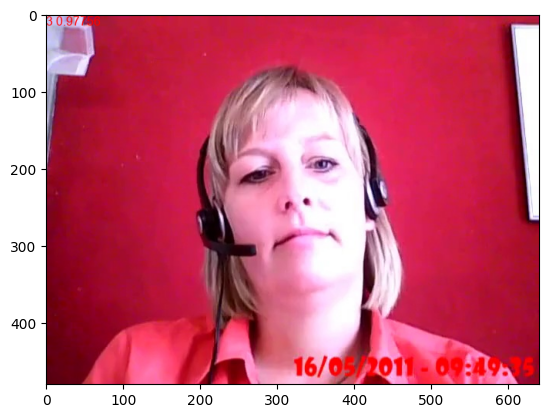

In [ ]:
predict(model, r'C:\Users\zhang\Downloads\githubdepression\githubdepression\implementation\AV2014_Training_data_NYU\smallTraining\images\1\1.jpg')


Prediction :  2 , Score:  62.802452
tensor([[2]])


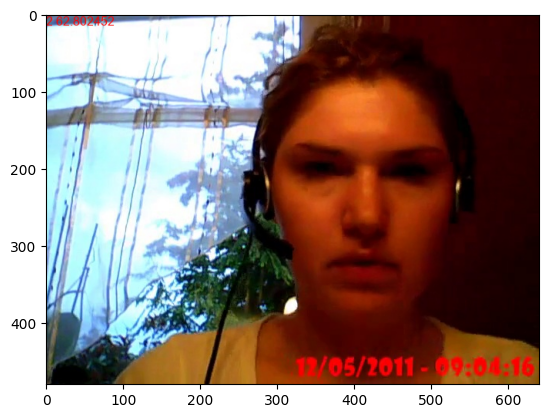

In [ ]:
predict(model, r'C:\Users\zhang\Downloads\githubdepression\githubdepression\implementation\AV2014_Training_data_NYU\smallTraining\images\4\4.jpg')
